# Segmenting remote sensing imagery with text prompts and the Segment Anything Model (SAM)

[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts.ipynb)
[![image](https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft)](https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/opengeos/segment-geospatial&urlpath=lab/tree/segment-geospatial/docs/examples/text_prompts.ipynb&branch=main)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts.ipynb)

This notebook shows how to generate object masks from text prompts with the Segment Anything Model (SAM).

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator.

## Install dependencies

Uncomment and run the following cell to install the required dependencies.

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
%pip install segment-geospatial groundingdino-py leafmap localtileserver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.3/262.3 kB 22.3 MB/s eta

In [2]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

## Create an interactive map

In [3]:
m = leafmap.Map(center=[-22.17615, -51.253043], zoom=18, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[-22.17615, -51.253043], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Download a sample image

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [4]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.2565, -22.1777, -51.2512, -22.175]

In [5]:

image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 01/45
Downloaded image 02/45
Downloaded image 03/45
Downloaded image 04/45
Downloaded image 05/45
Downloaded image 06/45
Downloaded image 07/45
Downloaded image 08/45
Downloaded image 09/45
Downloaded image 10/45
Downloaded image 11/45
Downloaded image 12/45
Downloaded image 13/45
Downloaded image 14/45
Downloaded image 15/45
Downloaded image 16/45
Downloaded image 17/45
Downloaded image 18/45
Downloaded image 19/45
Downloaded image 20/45
Downloaded image 21/45
Downloaded image 22/45
Downloaded image 23/45
Downloaded image 24/45
Downloaded image 25/45
Downloaded image 26/45
Downloaded image 27/45
Downloaded image 28/45
Downloaded image 29/45
Downloaded image 30/45
Downloaded image 31/45
Downloaded image 32/45
Downloaded image 33/45
Downloaded image 34/45
Downloaded image 35/45
Downloaded image 36/45
Downloaded image 37/45
Downloaded image 38/45
Downloaded image 39/45
Downloaded image 40/45
Downloaded image 41/45
Downloaded image 42/45
Downloaded image 43/45
Downloaded 

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# combine_svgs('/content/drive/My Drive/car_stencil.svg'


Mounted at /content/drive


You can also use your own image. Uncomment and run the following cell to use your own image.

In [7]:
image = '/content/drive/My Drive/hyundai-creta-side-view-844197.jpg'

Display the downloaded image on the map.

In [8]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=37796022.0, center=[-22.17615, -51.253043], controls=(ZoomControl(options=['position', 'zoom_in_tex…

ERROR:localtileserver.web.application:Exception on /api/tiles/17/65534/65534.png [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rio_tiler/io/base.py", line 94, in tile_exists
    tile_bounds = transform_bounds(
  File "/usr/local/lib/python3.10/dist-packages/rasterio/warp.py", line 148, in transform_bounds
    dst_crs = CRS.from_user_input(dst_crs)
  File "rasterio/crs.pyx", line 783, in rasterio.crs.CRS.from_user_input
rasterio.errors.CRSError: CRS is invalid: None

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/usr/local/lib/python3.10/dist-packages/flask_restx/api.py", line 402, 

## Initialize LangSAM class

The initialization of the LangSAM class might take a few minutes. The initialization downloads the model weights and sets up the model for inference.

In [9]:
# sam = LangSAM()
sam1=LangSAM()
# sam2=LangSAM()

ERROR:localtileserver.web.application:Exception on /api/tiles/16/32767/32767.png [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rio_tiler/io/base.py", line 94, in tile_exists
    tile_bounds = transform_bounds(
  File "/usr/local/lib/python3.10/dist-packages/rasterio/warp.py", line 148, in transform_bounds
    dst_crs = CRS.from_user_input(dst_crs)
  File "rasterio/crs.pyx", line 783, in rasterio.crs.CRS.from_user_input
rasterio.errors.CRSError: CRS is invalid: None

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "/usr/local/lib/python3.10/dist-packages/flask_restx/api.py", line 402, 

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:32<00:00, 79.4MB/s]


## Specify text prompts

In [10]:
# print(sam.masks)
print(sam1.masks)
# print(sam2.masks)

None


In [11]:
# text_prompt = "tyres"
text_prompt_1="car"
# text_prompt_2="tyres"

## Segment the image

Part of the model prediction includes setting appropriate thresholds for object detection and text association with the detected objects. These threshold values range from 0 to 1 and are set while calling the predict method of the LangSAM class.

`box_threshold`: This value is used for object detection in the image. A higher value makes the model more selective, identifying only the most confident object instances, leading to fewer overall detections. A lower value, conversely, makes the model more tolerant, leading to increased detections, including potentially less confident ones.

`text_threshold`: This value is used to associate the detected objects with the provided text prompt. A higher value requires a stronger association between the object and the text prompt, leading to more precise but potentially fewer associations. A lower value allows for looser associations, which could increase the number of associations but also introduce less precise matches.

Remember to test different threshold values on your specific data. The optimal threshold can vary depending on the quality and nature of your images, as well as the specificity of your text prompts. Make sure to choose a balance that suits your requirements, whether that's precision or recall.

In [12]:
# temp11=sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)
# print(temp11)

## Visualize the results

Show the result with bounding boxes on the map.

In [13]:
temp22=sam1.predict(image, text_prompt_1, box_threshold=0.24, text_threshold=0.24)
print(temp22)

None


In [14]:
# temp44=sam2.predict(image, text_prompt_2, box_threshold=0.24, text_threshold=0.24)
# print(temp44)

In [15]:
# print(sam.masks)
# print(sam.prediction)
print(sam1.masks)
print(sam1.prediction)
# print(sam2.masks)
# print(sam2.prediction)

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


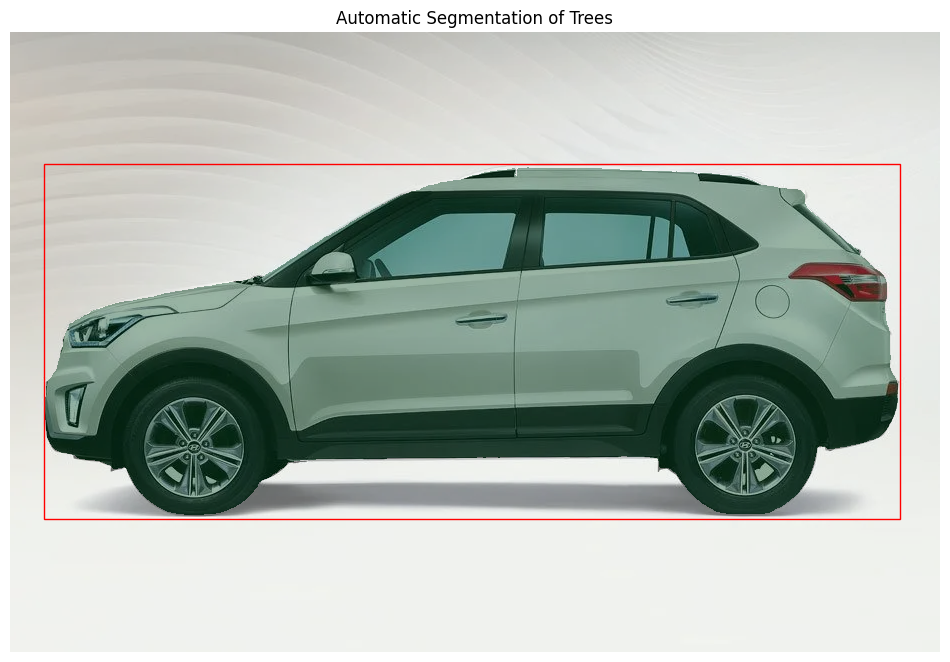

In [16]:
# sam.show_anns(
#     cmap='Greens',
#     box_color='red',
#     title='Automatic Segmentation of Trees',
#     blend=True,

# )
sam1.show_anns(
    cmap='Greens',
    box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True,
)
# sam2.show_anns(
#     cmap='Greens',
#     box_color='red',
#     title='Automatic Segmentation of Trees',
#     blend=True,
# )

![](https://i.imgur.com/ytKMTlA.png)

Show the result without bounding boxes on the map.

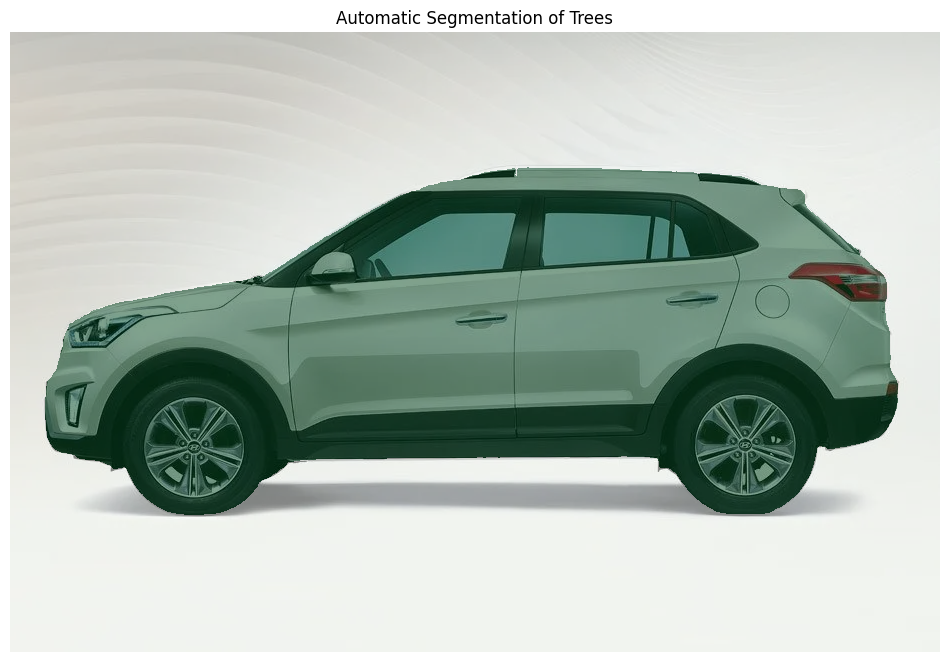

In [17]:
# sam.show_anns(
#     cmap='Greens',
#     add_boxes=False,
#     alpha=0.5,
#     title='Automatic Segmentation of Trees',
# )
sam1.show_anns(
    cmap='Greens',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of Trees',
)
# sam2.show_anns(
#     cmap='Greens',
#     add_boxes=False,
#     alpha=0.5,
#     title='Automatic Segmentation of Trees',
# )

![](https://i.imgur.com/3Iq2kt1.png)

Show the result as a grayscale image.

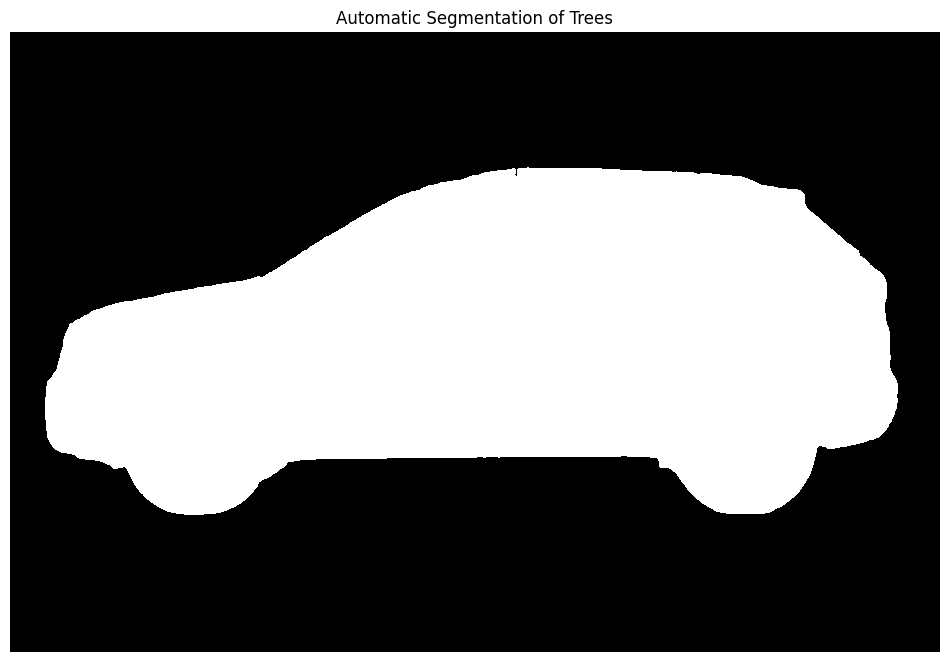

In [18]:
# sam.show_anns(
#     cmap='Greys_r',
#     add_boxes=False,
#     alpha=1,
#     title='Automatic Segmentation of Trees',
#     blend=False,
#     output='trees.tif',
# )
sam1.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Trees',
    blend=False,
    output='trees.tif',
)
# sam2.show_anns(
#     cmap='Greys_r',
#     add_boxes=False,
#     alpha=1,
#     title='Automatic Segmentation of Trees',
#     blend=False,
#     output='trees.tif',
# )

In [19]:
!pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.5 MB/s eta 0:00:00


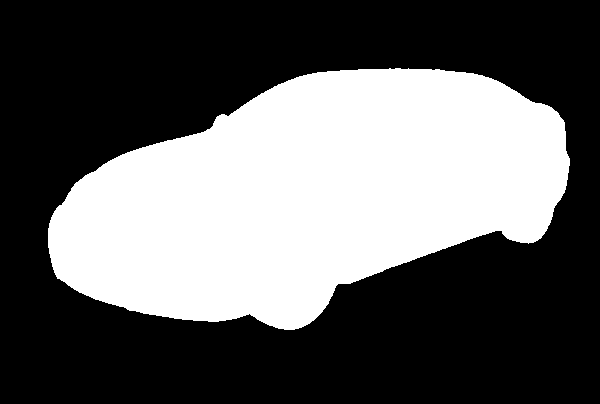

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming sam.masks contains the segmented masks
mask = sam1.masks[0].cpu().numpy()  # Assuming you have a single mask
mask = np.uint8(mask * 255)  # Convert to binary image (0 or 255)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw contours
border_image = np.zeros_like(mask)

# Draw contours on the blank image
cv2.drawContours(border_image, contours, -1, (255), thickness=cv2.FILLED)

# Show or save the resulting border image
cv2.imwrite("/content/drive/My Drive/front-left-output.jpg", border_image)
cv2_imshow( border_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import torch
import numpy as np
import cv2

# Assuming 'segmented_mask' is your tensor representing the segmented mask obtained from SAM model

# Convert the tensor to a NumPy array
segmented_mask_np = sam1.masks.cpu().numpy()

# Convert the mask to an image
# Code for creating image and assigning colors remains the same as before
# Assuming 'segmented_mask_np' is your NumPy array representing the segmented mask

class_colors = {
    0: [0, 0, 0],  # Class 0: Black
    1: [255, 0, 0],  # Class 1: Red
    2: [0, 255, 0],  # Class 2: Green
    # Add more colors for additional classes if needed
}

# Assuming 'segmented_mask_np' is your NumPy array representing the segmented mask
# Assuming 'class_colors' is defined as in the previous examples

# Create an empty image with the same dimensions as the segmented mask
image = np.zeros((segmented_mask_np.shape[1], segmented_mask_np.shape[2], 3), dtype=np.uint8)

# Assign colors to pixels based on the segmented mask
for class_index, color in class_colors.items():
    image[segmented_mask_np[0] == class_index] = color  # Assuming the first dimension is the batch dimension



# Save the image
cv2.imwrite('/content/drive/My Drive/segmented_mask.jpg', image)



True

In [ ]:
segmentation_mask_np = sam1.masks.cpu().numpy()

# Perform edge detection using Canny edge detector
edges = cv2.Canny(segmentation_mask_np.astype(np.uint8), 30, 100)

# Convert the edges to a binary tensor
border_tensor = torch.tensor(edges, dtype=torch.float32)

# Invert the tensor (0s become 1s and 1s become 0s) to match the original mask format
border_tensor = 1 - border_tensor

# Ensure the tensor has the same shape as the input mask
border_tensor = border_tensor.unsqueeze(0)  # Add batch dimension



!pip install svgwrite
import svgwrite

# Input: Define your SAM model instance, `sam`

# Assuming sam.masks is a tensor representing the segmented masks
# Also assuming sam.masks is a 3D tensor (batch_size, height, width)
batch_size, height, width = border_tensor.shape

# Choose output path and file name
output_path = "/content/drive/My Drive/"  # Adjust the path according to your preference
output_filename = "sam_border_mask.svg"

path_new1=""
# Create SVG drawing
dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}")

style = """
.myRect {
    fill: blue;
}

.myCircle {
    fill: red;
    stroke: black;
}
.drawing1{
  stroke-width:1;
  opacity='0.1';

}
"""

# Add CSS styles to SVG

count=0
# Iterate through each mask in the batch
for b in range(batch_size):
    mask = border_tensor[b].cpu().numpy()  # Assuming you want CPU tensor
    print("hi")
    # Initialize SVG path string for the current mask
    path = ""

  # Iterate through mask pixels and create paths for non-zero pixels
    for y in range(height):
        for x in range(width):
            if mask[y, x] > 0:  # Append coordinates only if pixel value is greater than 0
                count=count+1
                # Add SVG path for the current non-zero pixel
                b=b+1
                path += f"M{x},{y}h1v1h-1v-1z"

    # Add the path to the SVG drawing with a unique color for each mask
    # dwg.add(dwg.path(d=path, fill=f"rgb({b * 30}, {255 - b * 30}, 0)"))  # Adjust fill color as needed
    dwg.add(dwg.path(d=path,stroke="green"))
    # dwg.add(dwg.path(stroke="#ffffff"))
    # dwg.add(dwg.path(fill="none"))
    # dwg.add(dwg.rect())
    # dwg.add_stylesheet(style)

    path_new1=path_new1+path
    # dwg.add(dwg.path(d=path,stroke-width="4"))

# Save SVG
print(count)
dwg.save()
print(f"SVG file saved successfully to: {output_path}{output_filename}")

hi
404
SVG file saved successfully to: /content/drive/My Drive/sam_border_mask.svg


In [ ]:
a=5
a

5

In [23]:
# import torch
# import torchvision.transforms as transforms
# from PIL import Image

# def get_segmentation_mask(model, input_image):
#   preprocess=transforms.Compose([
#       transforms.ToTensor(),
#       transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225]),
#   ])
#   input_tensor=preprocess(input_image)
#   input_batch=input_tensor.unsqueeze(0)
#    # Perform inference
#   with torch.no_grad():
#       output = model(input_batch)['out'][0]
#   output_predictions = output.argmax(0)  # Assuming output is of shape (C, H, W)

#   # Post-process the mask if needed

#   # Extract the masked region
#   masked_region = input_image.copy()
#   masked_region.putalpha(output_predictions.byte().numpy() * 255)

#   return masked_region

# # Example usage
# input_image_path = "/content/drive/My Drive/front-left.jpg"
# input_image = Image.open(input_image_path).convert("RGB")

# # Assuming model is already initialized with your Semantic Segmentation model
# masked_region = get_segmentation_mask(sam, input_image)
# masked_region.save("masked_region.png")



# import cv2
# from segment_anything import SamAutomaticMaskGenerator

# mask_generator = SamAutomaticMaskGenerator(sam)

# image_bgr = cv2.imread(image)
# image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# result = mask_generator.generate(image_rgb)
# !pip install svgwrite
# import cv2
# import numpy as np
# import svgwrite
# # from detectron2.structures import BitMasks

# def masks_to_svg_and_save(image, predictions, output_svg_path):
#     # Get the segmentation masks from the Detectron2 predictions
#     masks = predictions['instances'].pred_masks.cpu().numpy()

#     # Create an SVG object
#     dwg = svgwrite.Drawing(size=(image.shape[1], image.shape[0]), profile='tiny')

#     # Iterate through the masks and draw them on the SVG canvas
#     for mask in masks:
#         # Convert binary mask to contours
#         contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         # Draw contours on the SVG canvas
#         for contour in contours:
#             points = contour.squeeze().tolist()
#             if len(points) > 2:  # At least 3 points needed to form a polygon
#                 dwg.add(dwg.polygon(points, fill='blue'))

#     # Save the SVG file
#     dwg.saveas(output_svg_path)

# # Example usage
# image_path = '/content/drive/My Drive/front-left.jpg'  # Replace with the path to your original image
# image = cv2.imread(image_path)
# predictions = sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)  # Replace with the output from Detectron2 prediction
# output_svg_path = '/content/drive/My Drive/front-left.svg'  # Replace with your desired output path

# masks_to_svg_and_save(image, predictions, output_svg_path)










# import cv2
# import svgwrite
# import numpy as np

# def masks_to_svg(image, masks):
#     contours, _ = cv2.findContours(masks.cpu().numpy().astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     svg_document = svgwrite.Drawing(filename="output.svg", size=(image.shape[1], image.shape[0]))

#     for contour in contours:
#         points = [(int(point[0][0]), int(point[0][1])) for point in contour]
#         svg_document.add(svgwrite.shapes.Polygon(points, fill="none", stroke="black"))

#     svg_document.save()

# # Example usage:
# # Assuming `image` is the input image and `masks` is a tensor object containing segmentation masks generated by the SAM model
# masks_to_svg(image, sam.masks)








# import torch
# import svgwrite

# # Assuming masks is a 3D tensor (batch_size, height, width)
# batch_size, height, width = sam.masks.shape

# # Create SVG drawing
# dwg = svgwrite.Drawing("combined_masks.svg")

# # Iterate through each mask in the batch
# for b in range(batch_size):
#     mask = sam.masks[b].cpu().numpy()  # Assume you want CPU tensor

#     # Iterate through mask pixels and create paths
#     for y in range(height):
#         for x in range(width):
#             if mask[y, x]:
#                 d = f"M {x} {y} l 1 0 l 0 1 l -1 0 l 0 -1 z"  # Simple path
#                 dwg.add(dwg.path(d=d, fill="black"))  # Adjust fill color as needed

# # Save SVG
# dwg.save()









# import torch
# import svgwrite

# # Input: Define your tensor of binary masks, `masks`

# # Assuming masks is a 3D tensor (batch_size, height, width)
# batch_size, height, width = sam.masks.shape

# # Choose desired output path and file name
# output_path = "/content/drive/My Drive/"  # Adjust the path according to your preference
# output_filename = "combined_masks2.svg"

# # Create SVG drawing
# dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}")  # Combine path and filename

# # Iterate through each mask in the batch
# for b in range(batch_size):
#     mask = sam.masks[b].cpu().numpy()  # Assume you want CPU tensor

#     # Iterate through mask pixels and create paths
#     for y in range(height):
#         for x in range(width):
#             if mask[y, x]:
#                 d = f"M {x} {y} l 1 0 l 0 1 l -1 0 l 0 -1 z"  # Simple path
#                 dwg.add(dwg.path(d=d, fill="blue"))  # Adjust fill color as needed

# # Save SVG
# dwg.save()
# print(f"SVG file saved successfully to: {output_path}{output_filename}")










# import torch
# import svgwrite

# # Input: Define your SAM model instance, `sam`

# # Assuming sam.masks is a tensor representing the segmented masks
# # Also assuming sam.masks is a 3D tensor (batch_size, height, width)
# batch_size, height, width = sam.masks.shape

# # Choose desired output path and file name
# output_path = "/content/drive/My Drive/"  # Adjust the path according to your preference
# output_filename = "sam_masks.svg"

# # Create SVG drawing
# dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}")

# # Iterate through each mask in the batch
# for b in range(batch_size):
#     mask = sam.masks[b].cpu().numpy()  # Assuming you want CPU tensor

#     # Initialize a list to store SVG path strings for the current mask
#     paths = []

#     # Iterate through mask pixels and create paths for non-zero pixels
#     for y in range(height):
#         for x in range(width):
#             if mask[y, x]:
#                 # Create SVG path for the current pixel
#                 d = f"M {x} {y} l 1 0 l 0 1 l -1 0 l 0 -1 z"  # Simple path
#                 paths.append(d)

#     # Combine all SVG paths into a single path for the current mask
#     combined_path = " ".join(paths)

#     # Add the combined path to the SVG drawing with a unique color for each mask
#     dwg.add(dwg.path(d=combined_path, fill=f"rgb({b * 30}, {255 - b * 30}, 0)"))  # Adjust fill color as needed

# # Save SVG
# dwg.save()
# print(f"SVG file saved successfully to: {output_path}{output_filename}")






a=0
b=0

# import svgwrite

# # Input: Define your SAM model instance, `sam`

# # Assuming sam.masks is a tensor representing the segmented masks
# # Also assuming sam.masks is a 3D tensor (batch_size, height, width)
# batch_size, height, width = sam.masks.shape

# # Choose output path and file name
# output_path = "/content/drive/My Drive/"  # Adjust the path according to your preference
# output_filename = "sam_masks6_tyres.svg"

# path_new=""
# # Create SVG drawing
# dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}")

# # Iterate through each mask in the batch
# for b in range(batch_size):
#     mask = sam.masks[b].cpu().numpy()  # Assuming you want CPU tensor

#     # Initialize SVG path string for the current mask
#     path = ""

#   # Iterate through mask pixels and create paths for non-zero pixels
#     for y in range(height):
#         for x in range(width):
#             if mask[y, x] > 0:  # Append coordinates only if pixel value is greater than 0
#                 # Add SVG path for the current non-zero pixel
#                 a=a+1
#                 path += f"M{x},{y}h1v1h-1v-1z"

#     # Add the path to the SVG drawing with a unique color for each mask
#     dwg.add(dwg.path(d=path, fill="none"))  # Adjust fill color as needed
#     dwg.add(dwg.path(d=path,stroke="blue"))
#     path_new=path_new+path
#     # dwg.add(dwg.path(d=path,stroke-width="4"))

# # Save SVG
# dwg.save()
# print(f"SVG file saved successfully to: {output_path}{output_filename}")









import svgwrite

# Input: Define your SAM model instance, `sam`

# Assuming sam.masks is a tensor representing the segmented masks
# Also assuming sam.masks is a 3D tensor (batch_size, height, width)
batch_size, height, width = sam1.masks.shape

# Choose output path and file name
output_path = "/content/drive/My Drive/"  # Adjust the path according to your preference
output_filename = "sam_masks6.svg"

path_new1=""
# Create SVG drawing
dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}")

style = """
.myRect {
    fill: blue;
}

.myCircle {
    fill: red;
    stroke: black;
}
.drawing1{
  stroke-width:1;
  opacity='0.1';

}
"""

# Add CSS styles to SVG


# Iterate through each mask in the batch
for b in range(batch_size):
    mask = sam1.masks[b].cpu().numpy()  # Assuming you want CPU tensor

    # Initialize SVG path string for the current mask
    path = ""

  # Iterate through mask pixels and create paths for non-zero pixels
    for y in range(height):
        for x in range(width):
            if mask[y, x] > 0:  # Append coordinates only if pixel value is greater than 0
                # Add SVG path for the current non-zero pixel
                b=b+1
                path += f"M{x},{y}h1v1h-1v-1z"

    # Add the path to the SVG drawing with a unique color for each mask
    # dwg.add(dwg.path(d=path, fill=f"rgb({b * 30}, {255 - b * 30}, 0)"))  # Adjust fill color as needed
    dwg.add(dwg.path(d=path,stroke="#00FFEF", fill="none", stroke_width=4))
    # dwg.add(dwg.path(stroke="#ffffff"))
    # dwg.add(dwg.path(fill="none"))
    # dwg.add(dwg.rect())
    # dwg.add_stylesheet(style)

    path_new1=path_new1+path
    # dwg.add(dwg.path(d=path,stroke-width="4"))

# Save SVG
dwg.save()
print(f"SVG file saved successfully to: {output_path}{output_filename}")




















# points_data = []
# for b in range(batch_size):
#     mask = sam.masks[b].cpu().numpy()  # Assume you want CPU tensor
#     for y in range(height):
#         for x in range(width):
#             if mask[y, x]:
#                 points_data.append(f"{x},{y}")

# # Create the SVG drawing with the specified format
# dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}", size=(width, height), profile="tiny")

# # Create the polygon element
# polygon = dwg.polygon(points=points_data, fill="white")

# # Add the polygon to the drawing
# dwg.add(polygon)

# # Save the SVG file
# dwg.save()
# print(f"SVG file saved successfully to: {output_path}{output_filename}")









SVG file saved successfully to: /content/drive/My Drive/sam_masks6.svg


In [ ]:
print(a,b)

31814 209334


In [ ]:
# !pip install svglib
# import io
# import svglib
# from svglib.svglib import svg2rlg
# from reportlab.graphics.shapes import Drawing
# from reportlab.graphics.renderSVG import SVGCanvas, draw

# with open("/content/drive/My Drive/sam_masks6.svg") as fp:
#     svg_1_content = fp.read()

# with open("/content/drive/My Drive/sam_masks6_tyres.svg") as fp:
#     svg_2_content = fp.read()
# svg_1_element = svg2rlg(io.StringIO(svg_1_content))
# svg_2_element = svg2rlg(io.StringIO(svg_2_content))
# width = 100
# height = 100
# print(svg_1_element)
# svg_element = svg2rlg(io.StringIO(background_content))
# d = Drawing(width, height) # setting the width and height
# svg_1_element.scale(width / svg_1_element.width, height / svg_2_element.height)
# svg_2_element.scale(width / svg_1_element.width, height / svg_2_element.height)
# d.add(svg_1_element)
# d.add(svg_2_element)










# !pip install svgwrite
import svgwrite

# Load the first SVG file
file_path1 = "/content/drive/My Drive/sam_masks6.svg"
with open(file_path1, 'r') as file:
    svg_content1 = file.read()

# Load the second SVG file
file_path2 = "/content/drive/My Drive/sam_masks6_tyres.svg"
with open(file_path2, 'r') as file:
    svg_content2 = file.read()

# Choose output path and file name
output_path = "/content/drive/My Drive/"  # Adjust the path according to your preference
output_filename = "temp_sam_masks6.svg"

# Create SVG drawing
dwg = svgwrite.Drawing(filename=f"{output_path}{output_filename}")
dwg.add(dwg.path(d=path_new1, stroke="#00FFEF", opacity="0.50"))
# temp1111=dir(dwg.add(dwg.path()))
# print(temp1111)   #
dwg.add(dwg.path(d=path_new,stroke="#0B0EC1", opacity="0.15"))

dwg.save()

# # Create the main SVG content to hold both SVGs
# main_svg_content = f"""
# <svg width="600" height="300" xmlns="http://www.w3.org/2000/svg">
#     <foreignObject width="100%" height="100%">
#         {svg_content1}
#     </foreignObject>
#     <foreignObject width="100%" height="100%" x="300">
#         {svg_content2}
#     </foreignObject>
# </svg>
# """

# # Specify the file path to save the overlaid SVGs
# output_file_path = "/content/drive/My Drive/output_sam_mask6.svg"

# # Write the main SVG content containing both overlaid SVGs to the specified file path
# with open(output_file_path, 'w') as file:
#     file.write(main_svg_content)

# print(f"Overlaid SVGs saved successfully to: {output_file_path}")






# import svgwrite

# file_path1 = "/content/drive/My Drive/sam_masks6.svg"
# with open(file_path1, 'r') as f:
#     svg_content1 = f.read()

# # Load the second SVG file
# file_path2 = "/content/drive/My Drive/sam_masks6_tyres.svg"
# with open(file_path2, 'r') as f:
#     svg_content2 = f.read()

# # Parse the SVG content into SVG drawing objects
# dwg1 = svgwrite.Drawing()
# # dwg1.parse(svg_content1)

# dwg2 = svgwrite.Drawing()
# dwg2.parse(svg_content2)

# # Create the main SVG drawing to hold both SVGs
# main_dwg = svgwrite.Drawing(size=('400px', '200px'))

# # # Add the first SVG as an image at position (0, 0)
# # main_dwg.add(main_dwg.image(href=dwg1.tostring(), insert=(0, 0), size=('200px', '200px')))

# # # Add the second SVG as an image at position (200, 0)
# # main_dwg.add(main_dwg.image(href=dwg2.tostring(), insert=(200, 0), size=('200px', '200px')))
# main_dwg.add(main_dwg.image(href=dwg1.tostring(), insert=(0, 0)))

# # Add the second SVG as an image at position (200, 0)
# main_dwg.add(main_dwg.image(href=dwg2.tostring(), insert=(200, 0)))

# # Specify the file path to save the overlaid SVGs
# file_path = "/content/drive/My Drive/overlap.svg"

# # Save the main SVG drawing containing both overlaid SVGs to the specified file path
# main_dwg.saveas(file_path)

# print(f"Overlapped SVGs saved successfully to: {file_path}")#LEFT-25


In [ ]:
import svgwrite

def add_border_to_svg(input_svg_file, output_svg_file, border_width=5, border_color="black"):
    # Read the input SVG file
    with open(input_svg_file, "r") as f:
        svg_content = f.read()

    # Create a new SVG drawing
    drawing = svgwrite.Drawing(output_svg_file)

    # Parse the SVG content
    parsed_svg = svgwrite.fromstring(svg_content)

    # Add the parsed SVG content to the new drawing
    drawing.add(parsed_svg)

    # Get the width and height of the existing SVG content
    existing_width = drawing["width"]
    existing_height = drawing["height"]

    # Calculate the coordinates and size for the border
    border_x = border_y = -border_width / 2
    border_width += existing_width
    border_height = existing_height + border_width

    # Add a rectangle for the border
    border_rect = drawing.rect(insert=(border_x, border_y), size=(border_width, border_height),
                               fill="none", stroke=border_color, stroke_width=border_width)
    drawing.add(border_rect)

    # Save the modified SVG to the output file
    drawing.save()







# Example usage:
input_svg_file = "/content/drive/My Drive/temp_sam_masks6.svg"
output_svg_file = "/content/drive/My Drive/temp_new_sam_masks6.svg"
add_border_to_svg(input_svg_file, output_svg_file, border_width=5, border_color="black")


AttributeError: module 'svgwrite' has no attribute 'fromstring'

In [ ]:
# import xml.etree.ElementTree as ET

# def add_border_to_svg(input_svg_file, output_svg_file, border_width=5, border_color="black"):
#     # Parse the input SVG file
#     tree = ET.parse(input_svg_file)
#     root = tree.getroot()

#     # Get the width and height of the SVG content
#     # width = float(root.attrib["width"].replace("px", ""))
#     # height = float(root.attrib["height"].replace("px", ""))
#     # Get the width and height of the SVG content
#     width_str = root.attrib["width"]
#     height_str = root.attrib["height"]

#     if width_str.endswith("%"):
#         width_str = width_str[:-1]  # Remove the '%' sign
#     if height_str.endswith("%"):
#         height_str = height_str[:-1]  # Remove the '%' sign

#     width = float(width_str)
#     height = float(height_str)

#     # Create a new SVG element for the border wrapper
#     border_wrapper = ET.Element("svg")
#     border_wrapper.set("width", str(width + 2 * border_width))
#     border_wrapper.set("height", str(height + 2 * border_width))

#     # Create a rectangle for the border
#     border_rect = ET.Element("rect")
#     border_rect.set("x", "0")
#     border_rect.set("y", "0")
#     border_rect.set("width", str(width + 2 * border_width))
#     border_rect.set("height", str(height + 2 * border_width))
#     border_rect.set("fill", "none")
#     border_rect.set("stroke", border_color)
#     border_rect.set("stroke-width", str(border_width))

#     # Append the existing SVG content to the border wrapper
#     border_wrapper.append(root)

#     # Add the border rectangle to the border wrapper
#     border_wrapper.append(border_rect)

#     # Write the modified SVG to the output file
#     with open(output_svg_file, "wb") as f:
#         f.write(ET.tostring(border_wrapper))





import xml.etree.ElementTree as ET

def add_border_to_svg(input_svg_file, output_svg_file, border_width=5, border_color="black"):
    # Create an iterator for parsing the SVG file incrementally
    context = ET.iterparse(input_svg_file, events=("start", "end"))

    # Keep track of the SVG root element
    root = None

    # Iterate over the XML elements in the SVG file
    for event, elem in context:
        if event == "start":
            if root is None:
                root = elem
        elif event == "end":
            if elem.tag == "svg":
                # Calculate new width and height including border
                width_str = elem.attrib["width"]
                height_str = elem.attrib["height"]
                if width_str.endswith("%"):
                    width_str = width_str[:-1]  # Remove the '%' sign
                if height_str.endswith("%"):
                    height_str = height_str[:-1]  # Remove the '%' sign
                width = float(width_str) + 2 * border_width
                height = float(height_str) + 2 * border_width

                # Update width and height attributes
                elem.attrib["width"] = str(width)
                elem.attrib["height"] = str(height)

                # Create a rectangle for the border
                border_rect = ET.Element("rect")
                border_rect.set("x", "0")
                border_rect.set("y", "0")
                border_rect.set("width", str(width))
                border_rect.set("height", str(height))
                border_rect.set("fill", "none")
                border_rect.set("stroke", border_color)
                border_rect.set("stroke-width", str(border_width))

                # Append the border rectangle to the SVG element
                elem.append(border_rect)

                # Write the modified SVG to the output file
                tree = ET.ElementTree(elem)
                tree.write(output_svg_file)

                # Stop parsing the SVG file
                break




# Example usage:
input_svg_file = "/content/drive/My Drive/temp_sam_masks6.svg"
output_svg_file = "/content/drive/My Drive/temp_new_sam_masks6.svg"
add_border_to_svg(input_svg_file, output_svg_file, border_width=5, border_color="black")


In [ ]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import svgwrite

# Assuming your mask tensor is `mask` with shape (height, width)
mask = sam.masks.cpu().numpy()  # Assuming CPU tensor

# Define desired filepath and filename prefixes
output_path = "/content/drive/My Drive/"
filename_prefix_contours = "mask_contours"
filename_prefix_path = "mask_path"

# # Approach 1: Using OpenCV for contour approximation
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# dwg1 = svgwrite.Drawing(filename=f"{output_path}{filename_prefix_contours}.svg", size=(mask.shape[1], mask.shape[0]), profile="tiny")
# for contour in contours:
#     points = [[x, y] for x, y in contour]
#     polygon = dwg1.polygon(points=points, fill="white")
#     dwg1.add(polygon)
# dwg1.save()


y, x = np.where(mask)
path = matplotlib.patches.Path(np.vstack((x, y)).T)

dwg2 = svgwrite.Drawing(filename=f"{output_path}{filename_prefix_path}.svg", size=(mask.shape[1], mask.shape[0]), profile="tiny")
dwg2.add(dwg2.path(d=path.to_string(), fill="white"))
dwg2.save()

ValueError: too many values to unpack (expected 2)

In [ ]:
print(sam.masks)

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])


![](https://i.imgur.com/KtHwFbF.png)

Convert the result to a vector format.  

In [ ]:
# temp=sam.raster_to_vector("trees.tif", "trees.shp")
print(trees.tif)

NameError: name 'trees' is not defined

Show the results on the interactive map.

In [ ]:
m.add_raster("trees.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("trees.shp", layer_name="Vector", style=style)
m

## Interactive segmentation

In [ ]:
sam.show_map()

![](https://i.imgur.com/wydt5Xt.gif)